need to make the target from other data

you should be able to see if there is data leakage

keep in mind that you want to find deeper insight into what causes churn

sklearn has a drop in multi layter perceptron 

recommend trying to fit several different models

CV - use training set obviously. I like kfolds

take the oppportunity to figure out how to use grid search

- clean data

- graphs for presentation

derivative - line or plane tangent to a function (or whatever larger D ones are)

regression - more definitive infromation

- ROC Curve or AUC Curve - ROC is curve - and AUC is a number 
- framework of models
- partial dependency plots
- base-model, logistic regression
- interpretation, *feature importance*
- interpratation - linear regression
- 


In [4]:
import importlib
import churn_eval #import the module here, so that it can be reloaded.
importlib.reload(churn_eval)

<module 'churn_eval' from '/Users/sarahburgart/galvanize/week6/churn_case_study/churn_eval.py'>

In [5]:
# import regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# import evaluations tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# import plotting and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.insert(0,"/Users/sarahburgart/galvanize/week6/random-forests/src/")


import roc
from roc import plot_roc

#import churn_eval as c

%matplotlib inline

plt.style.use('ggplot')

In [6]:
# plot rocs?
'''
plot_roc(X, y, RandomForestClassifier, "Random Forest", n_estimators=20)
plot_roc(X, y, LogisticRegression, "Logistic Regression")
plot_roc(X, y,  DecisionTreeClassifier, " DecisionTreeClassifier")
plot_roc(X, y, KNeighborsClassifier, "KNeighborsClassifier")

'''

'\nplot_roc(X, y, RandomForestClassifier, "Random Forest", n_estimators=20)\nplot_roc(X, y, LogisticRegression, "Logistic Regression")\nplot_roc(X, y,  DecisionTreeClassifier, " DecisionTreeClassifier")\nplot_roc(X, y, KNeighborsClassifier, "KNeighborsClassifier")\n\n'

In [7]:
# test my functions
from sklearn.datasets import load_boston
boston = load_boston()
# House Prices
y = boston.target
# The other 13 features
X = boston.data
# split into test and train 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2, random_state=1)
#Xtrain, ytrain
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((404, 13), (102, 13), (404,), (102,))

In [8]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

rfr.fit(Xtrain, ytrain)
gbr.fit(Xtrain, ytrain)

models = [rfr, gbr]
model_names = ["rfr", "gbr"]

/Users/sarahburgart/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
churn_eval.cv_train_scores(models, model_names, X, y)

['rfr Train CV | MSE: -23.337 | R2: 0.583 ',
 'gbr Train CV | MSE: -18.591 | R2: 0.680 ']

NameError: name 'gdbr' is not defined

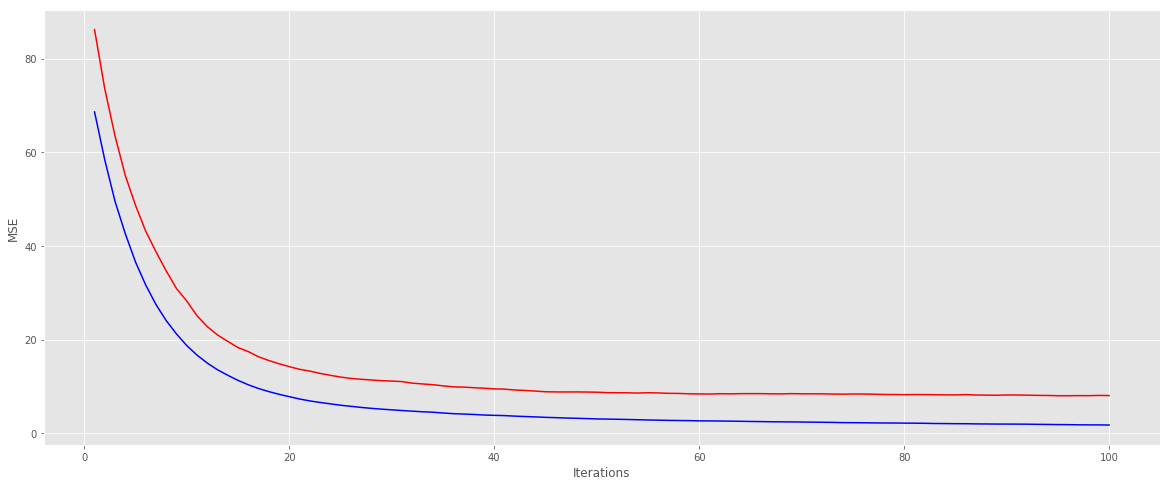

In [11]:
churn_eval.stage_score_plot(GradientBoostingRegressor, Xtrain, ytrain, Xtest, ytest)

In [ ]:
# GridSearchCV

'''>>> from sklearn import svm, datasets
>>> from sklearn.model_selection import GridSearchCV
>>> iris = datasets.load_iris()
>>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
>>> svc = svm.SVC(gamma="scale")
>>> clf = GridSearchCV(svc, parameters, cv=5)
>>> clf.fit(iris.data, iris.target)'''